In [ ]:
install.packages('fpp3')
library(fpp3)


The downloaded binary packages are in
	/var/folders/vc/1d1z34l176gfm4swwfttvslr0000gn/T//RtmpvmNRTX/downloaded_packages


Registered S3 method overwritten by 'tsibble':
  method               from 
  as_tibble.grouped_df dplyr

── Attaching packages ──────────────────────────────────────────── fpp3 1.0.2 ──

✔ tibble      3.3.0.9006     ✔ tsibble     1.1.6     
✔ dplyr       1.1.4          ✔ tsibbledata 0.4.1     
✔ tidyr       1.3.1          ✔ feasts      0.4.2     
✔ lubridate   1.9.4          ✔ fable       0.4.1     
✔ ggplot2     4.0.0          

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



# Calendar

They start the week IDs on Saturday

In [2]:
calendar <- readr::read_csv("calendar_afcs2025.csv", show_col_types = FALSE) %>%
    mutate(date = lubridate::mdy(date))

cat("amount of days with some event of 1:", sum(!is.na(calendar$event_type_1)), "\n")
cat("amount of days with some event of 2:", sum(!is.na(calendar$event_type_2)))

calendar

amount of days with some event of 1: 162 
amount of days with some event of 2: 5

date,wm_yr_wk,weekday,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_TX
<date>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
2011-01-29,11101,Saturday,1,1,2011,NA,NA,NA,NA,0
2011-01-30,11101,Sunday,2,1,2011,NA,NA,NA,NA,0
2011-01-31,11101,Monday,3,1,2011,NA,NA,NA,NA,0
2011-02-01,11101,Tuesday,4,2,2011,NA,NA,NA,NA,1
2011-02-02,11101,Wednesday,5,2,2011,NA,NA,NA,NA,0
2011-02-03,11101,Thursday,6,2,2011,NA,NA,NA,NA,1
2011-02-04,11101,Friday,7,2,2011,NA,NA,NA,NA,0
2011-02-05,11102,Saturday,1,2,2011,NA,NA,NA,NA,1
2011-02-06,11102,Sunday,2,2,2011,SuperBowl,Sporting,NA,NA,1


# Sell prices

We should probably join `sell_prices` with `calendar` on `wm_yr_wk` at some point. It's all the same store so we drop `TX_3` (the `store_id`)

In [3]:
sell_prices <- readr::read_csv("sell_prices_afcs2025.csv", show_col_types = FALSE) |> select(-store_id);
sell_prices

item_id,wm_yr_wk,sell_price
<chr>,<dbl>,<dbl>
FOODS_3_001,11101,2.28
FOODS_3_001,11102,2.28
FOODS_3_001,11103,2.28
FOODS_3_001,11104,2.28
FOODS_3_001,11105,2.28
FOODS_3_001,11106,2.28
FOODS_3_001,11107,2.28
FOODS_3_001,11108,2.28
FOODS_3_001,11109,2.28


# Train

The department referred to in canvas is always "3" here so it doesn't matter.

We change the `id` to match the `item_id`, because all of them are `TX_3`, the same store.

In [4]:
train <- readr::read_csv("sales_train_validation_afcs2025.csv", show_col_types = FALSE) %>%
    mutate(id = substr(id, 1, 11))

transposed <- t(train[,-1])  # Exclude 'id' column before transpose
colnames(transposed) <- train$id  # Set column names to 'id' values

df <- tibble::as_tibble(transposed) |> 
    mutate(day = row_number() - 1 + as.Date("2011-01-29")) |> 
    relocate(day, .before = 1)

train <- df |> as_tsibble(index = day)
train

day,FOODS_3_001,FOODS_3_002,FOODS_3_003,FOODS_3_004,FOODS_3_005,FOODS_3_006,FOODS_3_007,FOODS_3_008,FOODS_3_009,⋯,FOODS_3_818,FOODS_3_819,FOODS_3_820,FOODS_3_821,FOODS_3_822,FOODS_3_823,FOODS_3_824,FOODS_3_825,FOODS_3_826,FOODS_3_827
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2011-01-29,0,0,0,0,0,0,27,0,0,⋯,0,9,3,0,7,0,0,0,0,0
2011-01-30,2,0,0,0,1,0,27,0,0,⋯,0,0,2,0,5,0,1,0,0,0
2011-01-31,1,0,0,0,1,0,8,0,0,⋯,0,3,1,0,5,0,0,0,0,0
2011-02-01,3,0,0,0,0,0,0,0,0,⋯,0,0,3,0,3,0,1,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,1,0,0
2011-02-03,0,0,0,0,1,0,11,0,0,⋯,0,6,0,0,3,0,2,1,0,0
2011-02-04,1,0,0,0,2,0,8,0,0,⋯,0,1,1,0,0,0,0,0,0,0
2011-02-05,0,0,0,0,0,0,33,0,0,⋯,0,5,0,0,1,0,1,0,0,0
2011-02-06,2,0,0,0,0,0,16,0,0,⋯,0,0,1,0,7,0,1,1,0,0


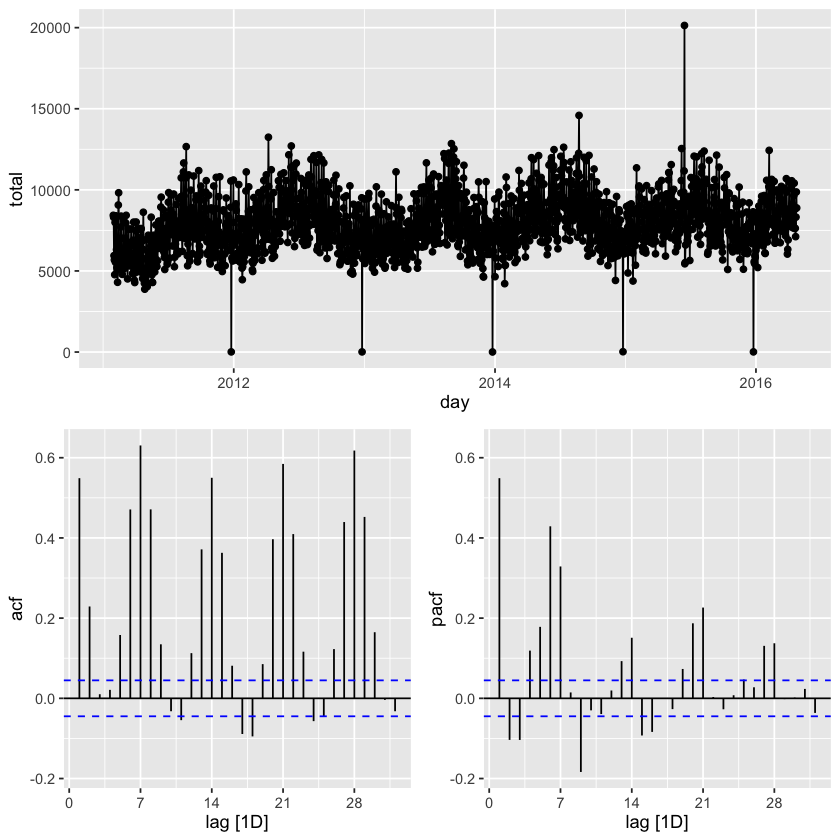

In [25]:
train <- train |> mutate(total = rowSums(across(-day)))
train |> gg_tsdisplay(total, plot_type="partial")

Plot variable not specified, automatically selected `.vars = FOODS_3_001`


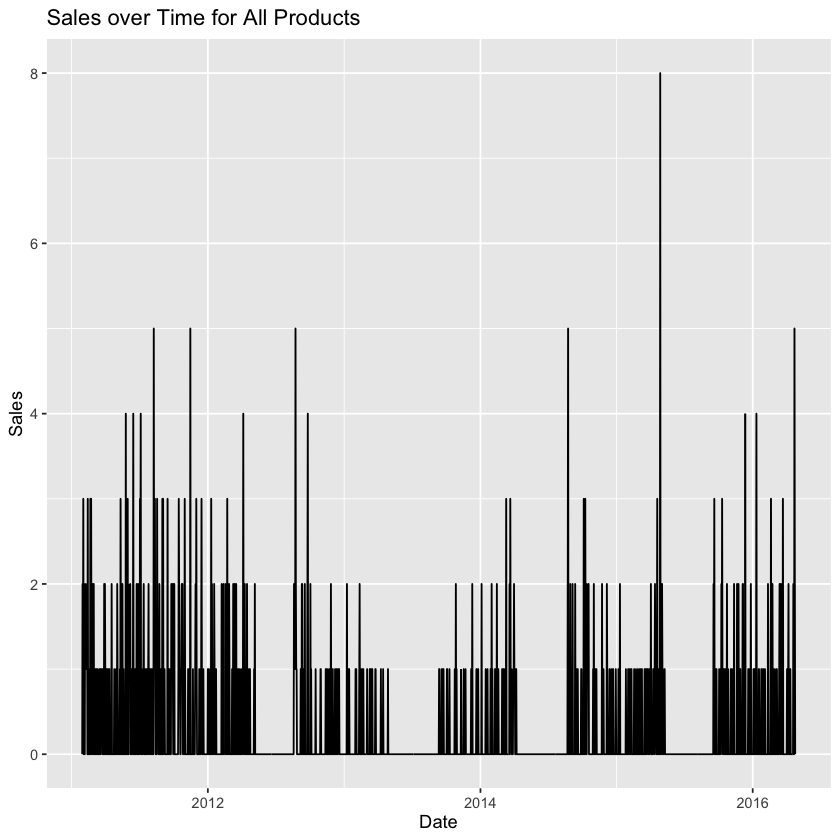

In [ ]:
autoplot(train) +
    labs(title = "Sales over Time for All Products", y = "Sales", x = "Date")

Lowest amount of sales (1) on the first day of Christmas (25th)
Maximum amount of sales (4027) on June 15th

In [ ]:
# Find the day with minimum and maximum total sales
min_day <- which.min(daily_sales)
max_day <- which.max(daily_sales)

cat("Minimum sales on day:", min_day-1, "with sales:", daily_sales[min_day], "\n")
cat("Maximum sales on day:", max_day-1, "with sales:", daily_sales[max_day], "\n")


Minimum sales on day: 1061 with sales: 1 
Maximum sales on day: 1598 with sales: 4027 
